Programa em Python para calcular as frequências naturais de vibração e os modos normais (deslocamentos relativos) de uma cadeia atômica finita com 2, 3 e 4 átomos, incluindo interações com vizinhos mais distantes (segunda vizinhança) no último caso.

In [59]:
#Biblioteca
import numpy as np
import matplotlib.pyplot as plt

Nas frequencias considerando uma serie harmonica chegamos em um problema de autovalor e geramos a matriz rigidez
((omega^2 M)+K) A = 0 -> K A = omega^2 M A e resolvemos a inversa como (inv(M) K) A = omega^2 A

Com isso calcula os autovalores e gera o valor da frequencia em rad/s

In [60]:
def resolver_autovalor(M, K):
    #Calcular a serie harmonica e seu inverso
    Minv = np.linalg.inv(M)
    A = Minv @ K
    # Calculando os autovalores e autovetores
    eigvals, eigvecs = np.linalg.eig(A)
    # Frequências naturais
    omegas = np.sqrt(np.clip(eigvals.real, 0, None))
    ##ordenação de forma crescente para facilitar a visualização (na saida)
    idx = np.argsort(omegas)
    return omegas[idx], eigvecs[:, idx]

[m1] --- k --- [m2]

Como as extremidades são livres então não existe força restauradora extra nas pontas,apenas a mola entre as massas
As massas se movem livremente em linha
pensando na equação do movimento e que só existe um K entre elas
m1*x'1=-k(x1-x2)
m2*x'2=-k(x2-x1)
montando a matriz com essa relação logo no inicio da função como primeiro passo

In [61]:
def calcular_2_massas(m1, m2, k):
    #A matriz das massas aqui é gerada pela equação do movimento
    M = np.array([[m1, 0],
                  [0, m2]])
    #A matriz de rigidez é gerada ao olhar as frequencias como serie harmonica
    K = k * np.array([[1, -1],
                      [-1, 1]])
    return resolver_autovalor(M, K)

[m1] --- k --- [m2] --- k --- [m3]

In [62]:
def calcular_3_massas(m1, m2, m3, k):
    #A matriz diagonal das massas aqui é gerada pela equação do movimento
    M = np.diag([m1, m2, m3])
    #A matriz de rigidez é gerada ao olhar as frequencias como serie harmonica
    K = k * np.array([[1, -1, 0],
                      [-1, 2, -1],
                      [0, -1, 1]])
    return resolver_autovalor(M, K)

[m1] --- k --- [m2] --- k --- [m3] --- k --- [m4]
Com possibilidade de segunda vizinha k2

In [63]:
def calcular_4_massas(m1, m2, m3, m4, k1, k2=0):
    #A matriz diagonal das massas aqui é gerada pela equação do movimento
    M = np.diag([m1, m2, m3, m4])
    #A matriz de rigidez é gerada ao olhar as frequencias como serie harmonica
    K = k1 * np.array([[1, -1, 0, 0],
                       [-1, 2, -1, 0],
                       [0, -1, 2, -1],
                       [0, 0, -1, 1]])
    #A matriz de rigidez é gerada ao olhar as frequencias como serie harmonica
    ## considerando segunda vizinha k2
    if k2 != 0:
        K += k2 * np.array([[1, 0, -1, 0],
                           [0, 1, 0, -1],
                           [-1, 0, 1, 0],
                           [0, -1, 0, 1]])
    return resolver_autovalor(M, K)

Função para plotar o grafico dos modos

In [64]:
def plotar_modos(omegas, modos, titulo="Modos normais"):
    x = np.arange(len(omegas))
    plt.figure(figsize=(8,5))
    for i in range(modos.shape[1]):
        modo = modos[:, i]
        modo = modo / np.max(np.abs(modo))
        plt.plot(x, modo, marker='o', label=f'Modo {i+1}: ω={omegas[i]:.2f} rad/s')
    plt.xlabel("Índice da massa")
    plt.ylabel("Deslocamento normalizado")
    plt.title(titulo)
    plt.legend()
    plt.grid(True)
    plt.show()

Valores de teste

Gráfico de 2 massas
Frequências naturais: [0.         0.91287093]


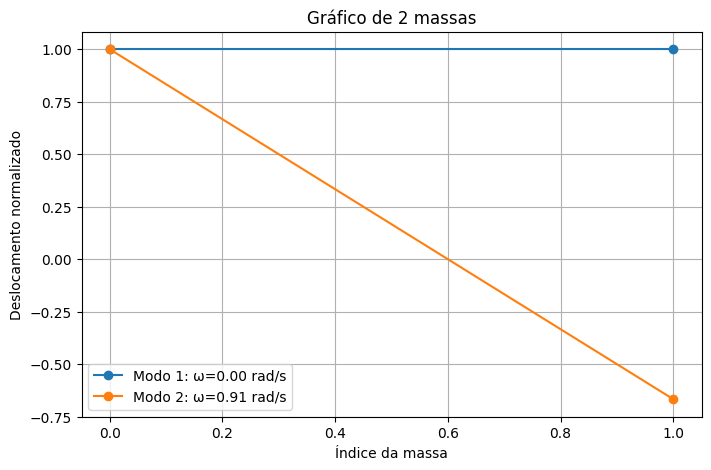


Gráfico de 3 massas
Frequências naturais: [1.17627415e-09 4.27525898e-01 8.26975376e-01]


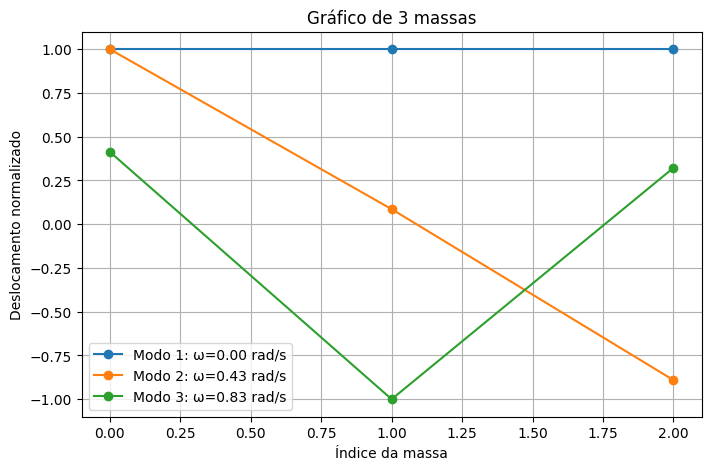


Gráfico de 4 massas (com 2ª vizinhança)
Frequências naturais: [0.         0.72994041 1.02073824 1.40459941]


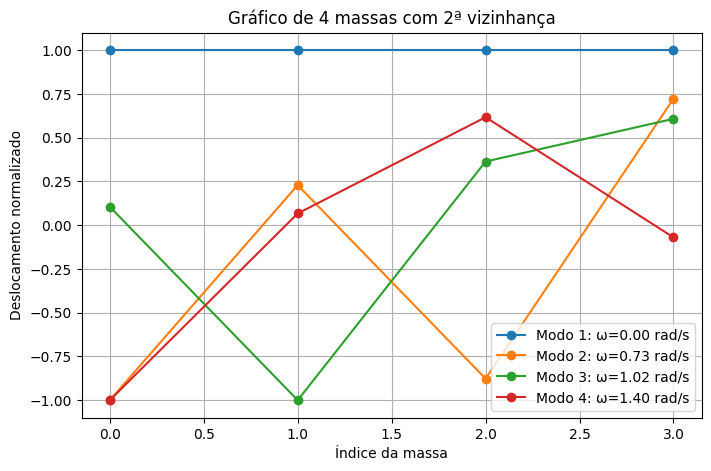

In [65]:
print("Gráfico de 2 massas")
omegas2, modos2 = calcular_2_massas(2, 3, 1)
print("Frequências naturais:", omegas2)
plotar_modos(omegas2, modos2, "Gráfico de 2 massas")

print("\nGráfico de 3 massas")
omegas3, modos3 = calcular_3_massas(5, 4, 6, 1)
print("Frequências naturais:", omegas3)
plotar_modos(omegas3, modos3, "Gráfico de 3 massas")

print("\nGráfico de 4 massas (com 2ª vizinhança)")
omegas4, modos4 = calcular_4_massas(3, 7, 5, 8, 1, 3)
print("Frequências naturais:", omegas4)
plotar_modos(omegas4, modos4, "Gráfico de 4 massas com 2ª vizinhança")